In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T00:48:12.184938+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8835067749023438e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.47651124000549316}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003906965255737305}
!!! {"init_...": 0.0005629062652587891}
!!! {"ete3Tree": 0.641507625579834}
!!! {"GenomeTree_hierarchical": 0.0028531551361083984}
!!! {"mutateBranchETEhierarchy": 0.0951235294342041}
!!! {"write_genome_short": 0.04822349548339844}


  4%|▍         | 8/193 [00:03<00:53,  3.47it/s]

!!! {"writeGenomeNoIndels": 0.1788485050201416}
!!! {"pl.DataFrame": 0.04391026496887207}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0201475620269775}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01736164093017578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003424406051635742}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001361370086669922}
!!! {"init_...": 0.00048732757568359375}
!!! {"ete3Tree": 8.249282836914062e-05}
!!! {"GenomeTree_hierarchical": 0.002149343490600586}
!!! {"mutateBranchETEhierarchy": 1.5020370483398438e-05}
!!! {"write_genome_short": 6.914138793945312

  8%|▊         | 15/193 [00:03<00:23,  7.43it/s]

!!! {"phastSimRun": 0.00010156631469726562}
!!! {"init_...": 0.0005762577056884766}
!!! {"ete3Tree": 0.0008108615875244141}
!!! {"GenomeTree_hierarchical": 0.0026857852935791016}
!!! {"mutateBranchETEhierarchy": 0.0001342296600341797}
!!! {"write_genome_short": 0.00013256072998046875}
!!! {"writeGenomeNoIndels": 0.00023865699768066406}
!!! {"pl.DataFrame": 0.00012230873107910156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006829500198364258}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020170211791992188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031321048736572266}
enter log_context_duration f

 13%|█▎        | 26/193 [00:03<00:11, 14.83it/s]

!!! {"init_...": 0.0009970664978027344}
!!! {"ete3Tree": 0.020158767700195312}
!!! {"GenomeTree_hierarchical": 0.0019643306732177734}
!!! {"mutateBranchETEhierarchy": 0.004979133605957031}
!!! {"write_genome_short": 0.0022695064544677734}
!!! {"writeGenomeNoIndels": 0.007780551910400391}
!!! {"pl.DataFrame": 0.0015401840209960938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.041437387466430664}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009233951568603516}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003210783004760742}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001151561

 21%|██        | 40/193 [00:03<00:05, 27.36it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003227710723876953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010037422180175781}
!!! {"init_...": 0.00041413307189941406}
!!! {"ete3Tree": 7.724761962890625e-05}
!!! {"GenomeTree_hierarchical": 0.002146005630493164}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 6.580352783203125e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 6.914138793945312e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004691362380981445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001

 24%|██▍       | 46/193 [00:03<00:04, 30.45it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009048223495483398}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012350082397460938}
!!! {"init_...": 0.00047898292541503906}
!!! {"ete3Tree": 0.02022576332092285}
!!! {"GenomeTree_hierarchical": 0.002595663070678711}
!!! {"mutateBranchETEhierarchy": 0.004678010940551758}
!!! {"write_genome_short": 0.0023071765899658203}
!!! {"writeGenomeNoIndels": 0.008875608444213867}
!!! {"pl.DataFrame": 0.0020818710327148438}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04325389862060547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009837150573730469}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newic

 31%|███       | 59/193 [00:04<00:03, 41.32it/s]

!!! {"write_genome_short": 0.0005345344543457031}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 8.082389831542969e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0051457881927490234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021219253540039062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003083944320678711}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011610984802246094}
!!! {"init_...": 0.0004067420959472656}
!!! {"ete3Tree": 5.8650970458984375e-05}
!!! {"GenomeTree_hierarchical": 0.0027914047241210938}
!!! {"mutateBranchETEhierarchy": 1.0013

 38%|███▊      | 73/193 [00:04<00:02, 50.41it/s]

!!! {"phastSimRun": 0.00011491775512695312}
!!! {"init_...": 0.0005903244018554688}
!!! {"ete3Tree": 6.29425048828125e-05}
!!! {"GenomeTree_hierarchical": 0.002978086471557617}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 7.557868957519531e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 7.43865966796875e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00606226921081543}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002186298370361328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031070709228515625}
enter log_context_duration for _do

 41%|████      | 79/193 [00:04<00:02, 49.34it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00039768218994140625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003136157989501953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010418891906738281}
!!! {"init_...": 0.00043129920959472656}
!!! {"ete3Tree": 6.29425048828125e-05}
!!! {"GenomeTree_hierarchical": 0.002148866653442383}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 6.985664367675781e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 7.128715515136719e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004433155059814453}
enter log_context_duration fo

 44%|████▍     | 85/193 [00:04<00:02, 42.05it/s]

!!! {"ete3Tree": 0.020686864852905273}
!!! {"GenomeTree_hierarchical": 0.0020847320556640625}
!!! {"mutateBranchETEhierarchy": 0.005089998245239258}
!!! {"write_genome_short": 0.0027015209197998047}
!!! {"writeGenomeNoIndels": 0.008249282836914062}
!!! {"pl.DataFrame": 0.0020415782928466797}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04312443733215332}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008955001831054688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003236055374145508}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001277923583984375}
!!! {"init_...": 0.0004675388

 50%|█████     | 97/193 [00:04<00:02, 45.95it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011675357818603516}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032148361206054688}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012993812561035156}
!!! {"init_...": 0.00046443939208984375}
!!! {"ete3Tree": 9.083747863769531e-05}
!!! {"GenomeTree_hierarchical": 0.0021436214447021484}
!!! {"mutateBranchETEhierarchy": 1.5735626220703125e-05}
!!! {"write_genome_short": 7.152557373046875e-05}
!!! {"writeGenomeNoIndels": 1.5974044799804688e-05}
!!! {"pl.DataFrame": 8.344650268554688e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004607200622558594}
enter log_context_duration 

 56%|█████▋    | 109/193 [00:05<00:01, 48.17it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.024829387664794922}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006628036499023438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=13, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003140687942504883}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011205673217773438}
!!! {"init_...": 0.00041294097900390625}
!!! {"ete3Tree": 0.0001323223114013672}
!!! {"GenomeTree_hierarchical": 0.002551555633544922}
!!! {"mutateBranchETEhierarchy": 2.3603439331054688e-05}
!!! {"write_genome_short": 8.249282836914062e-05}
!!! {"writeGenomeNoIndels": 3.933906555175781e-05}
!!! {"pl.DataFrame": 7.939338

 63%|██████▎   | 122/193 [00:05<00:01, 52.68it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032668113708496094}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.703636169433594e-05}
!!! {"init_...": 0.0004069805145263672}
!!! {"ete3Tree": 8.511543273925781e-05}
!!! {"GenomeTree_hierarchical": 0.0021076202392578125}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 6.914138793945312e-05}
!!! {"writeGenomeNoIndels": 1.3113021850585938e-05}
!!! {"pl.DataFrame": 8.678436279296875e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0043981075286865234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001

 70%|██████▉   | 135/193 [00:05<00:01, 56.51it/s]

!!! {"ete3Tree": 0.005808591842651367}
!!! {"GenomeTree_hierarchical": 0.002081632614135742}
!!! {"mutateBranchETEhierarchy": 0.0011582374572753906}
!!! {"write_genome_short": 0.0006759166717529297}
!!! {"writeGenomeNoIndels": 0.0020029544830322266}
!!! {"pl.DataFrame": 0.0004410743713378906}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.014609575271606445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000377655029296875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=21, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031538009643554688}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010371208190917969}
!!! {"init_...": 0.0004127

 74%|███████▎  | 142/193 [00:05<00:00, 58.46it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003938436508178711}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.775161743164062e-05}
!!! {"init_...": 0.0004086494445800781}
!!! {"ete3Tree": 6.532669067382812e-05}
!!! {"GenomeTree_hierarchical": 0.002151966094970703}
!!! {"mutateBranchETEhierarchy": 1.0967254638671875e-05}
!!! {"write_genome_short": 6.961822509765625e-05}
!!! {"writeGenomeNoIndels": 9.5367431640625e-06}
!!! {"pl.DataFrame": 6.842613220214844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0044896602630615234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018477439880371094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_

 80%|███████▉  | 154/193 [00:06<00:00, 47.54it/s]

!!! {"mutateBranchETEhierarchy": 0.007334232330322266}
!!! {"write_genome_short": 0.003201007843017578}
!!! {"writeGenomeNoIndels": 0.011099100112915039}
!!! {"pl.DataFrame": 0.002143383026123047}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05558347702026367}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011098384857177734}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009163618087768555}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012159347534179688}
!!! {"init_...": 0.0004754066467285156}
!!! {"ete3Tree": 0.02329850196838379}
!!! {"GenomeTree_hierarchical": 0.0020775794

 83%|████████▎ | 160/193 [00:07<00:02, 12.25it/s]

!!! {"mutateBranchETEhierarchy": 0.04460310935974121}
!!! {"write_genome_short": 0.021364212036132812}
!!! {"writeGenomeNoIndels": 0.07252264022827148}
!!! {"pl.DataFrame": 0.01261591911315918}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.32443761825561523}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0059549808502197266}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031974315643310547}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013685226440429688}
!!! {"init_...": 0.00048613548278808594}
!!! {"ete3Tree": 8.487701416015625e-05}
!!! {"GenomeTree_hierarchical": 0.002244710922

 85%|████████▌ | 165/193 [00:07<00:01, 15.06it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005951642990112305}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010251998901367188}
!!! {"init_...": 0.0004553794860839844}
!!! {"ete3Tree": 0.009275197982788086}
!!! {"GenomeTree_hierarchical": 0.002019166946411133}
!!! {"mutateBranchETEhierarchy": 0.0020444393157958984}
!!! {"write_genome_short": 0.0011401176452636719}
!!! {"writeGenomeNoIndels": 0.003477811813354492}
!!! {"pl.DataFrame": 0.0006895065307617188}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.020893573760986328}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004830360412597656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=740, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_n

 92%|█████████▏| 178/193 [00:07<00:00, 22.47it/s]

!!! {"ete3Tree": 0.0626373291015625}
!!! {"GenomeTree_hierarchical": 0.0020117759704589844}
!!! {"mutateBranchETEhierarchy": 0.01582026481628418}
!!! {"write_genome_short": 0.007350921630859375}
!!! {"writeGenomeNoIndels": 0.02523326873779297}
!!! {"pl.DataFrame": 0.004615068435668945}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12016773223876953}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002590179443359375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003187894821166992}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013589859008789062}
!!! {"init_...": 0.00047874450683593

 95%|█████████▍| 183/193 [00:07<00:00, 25.93it/s]

!!! {"ete3Tree": 0.009025335311889648}
!!! {"GenomeTree_hierarchical": 0.0025997161865234375}
!!! {"mutateBranchETEhierarchy": 0.0022287368774414062}
!!! {"write_genome_short": 0.0018873214721679688}
!!! {"writeGenomeNoIndels": 0.0036399364471435547}
!!! {"pl.DataFrame": 0.0007157325744628906}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02219414710998535}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004932880401611328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003061056137084961}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.870529174804688e-05}
!!! {"init_...": 0.000407218

100%|██████████| 193/193 [00:08<00:00, 23.47it/s]

!!! {"phastSimRun": 0.00012111663818359375}
!!! {"init_...": 0.0005838871002197266}
!!! {"ete3Tree": 6.604194641113281e-05}
!!! {"GenomeTree_hierarchical": 0.0021386146545410156}
!!! {"mutateBranchETEhierarchy": 1.0967254638671875e-05}
!!! {"write_genome_short": 6.866455078125e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 8.106231689453125e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005206108093261719}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019216537475585938}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00311279296875}
enter log_context_duration for _do_ru

exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.26593899726867676}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03390240669250488}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024831295013427734}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033065080642700195}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002112865447998047}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002265453338623047}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03291010856628418}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0026972293853759766}
enter log_context_duration for se

 43%|████▎     | 3/7 [00:00<00:00, 23.49it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.033242225646972656}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003525257110595703}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0023343563079833984}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03317427635192871}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0033740997314453125}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024297237396240234}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mis

100%|██████████| 7/7 [00:00<00:00, 24.38it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03380775451660156}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003557443618774414}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014514923095703125}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020472288131713867}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0030546188354492188}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.3664369583129883}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2767350673675537}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 161.39it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 28.746604442596436}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 607.64it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 134.38826727867126}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06388044357299805}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 196.97540092468262}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009380102157592773}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003876686096191406}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0003943443298339844}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.00045228004455566406}
ancestral


100%|██████████| 368/368 [00:00<00:00, 279215.61it/s]

process mutations:   0%|          | 1/368 [00:00<01:11,  5.10it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:15<12:12,  2.03s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.6s



process mutations:  13%|█▎        | 48/368 [00:58<06:19,  1.19s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min



process mutations:  24%|██▍       | 88/368 [01:43<05:20,  1.15s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.8min



process mutations:  35%|███▍      | 128/368 [02:27<04:30,  1.13s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.6min



process mutations:  46%|████▌     | 168/368 [03:10<03:42,  1.11s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.4min



process mutations:  57%|█████▋    | 208/368 [03:53<02:55,  1.10s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.2min



process mutations:  67%|██████▋   | 248/368 [04:38<02:12,  1.11s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.9min



process mutations:  78%|███████▊  | 288/368 [05:23<01:28,  1.11s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.7min



process mutations:  89%|████████▉ | 328/368 [06:08<00:44,  1.12s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.4min



process mutations: 100%|██████████| 368/368 [06:56<00:00,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.9min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  7.1min finished


process replicate: 100%|██████████| 1/1 [10:30<00:00, 630.24s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.08437037467956543}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 112
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'ac7fe577-fc94-8a39-b95c-7b8bb750e15f', 'ac7fe577-fc94-8a39-b95c-7b8bb750e15f', 'ac7fe577-fc94-8a39-b95c-7b8bb7
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


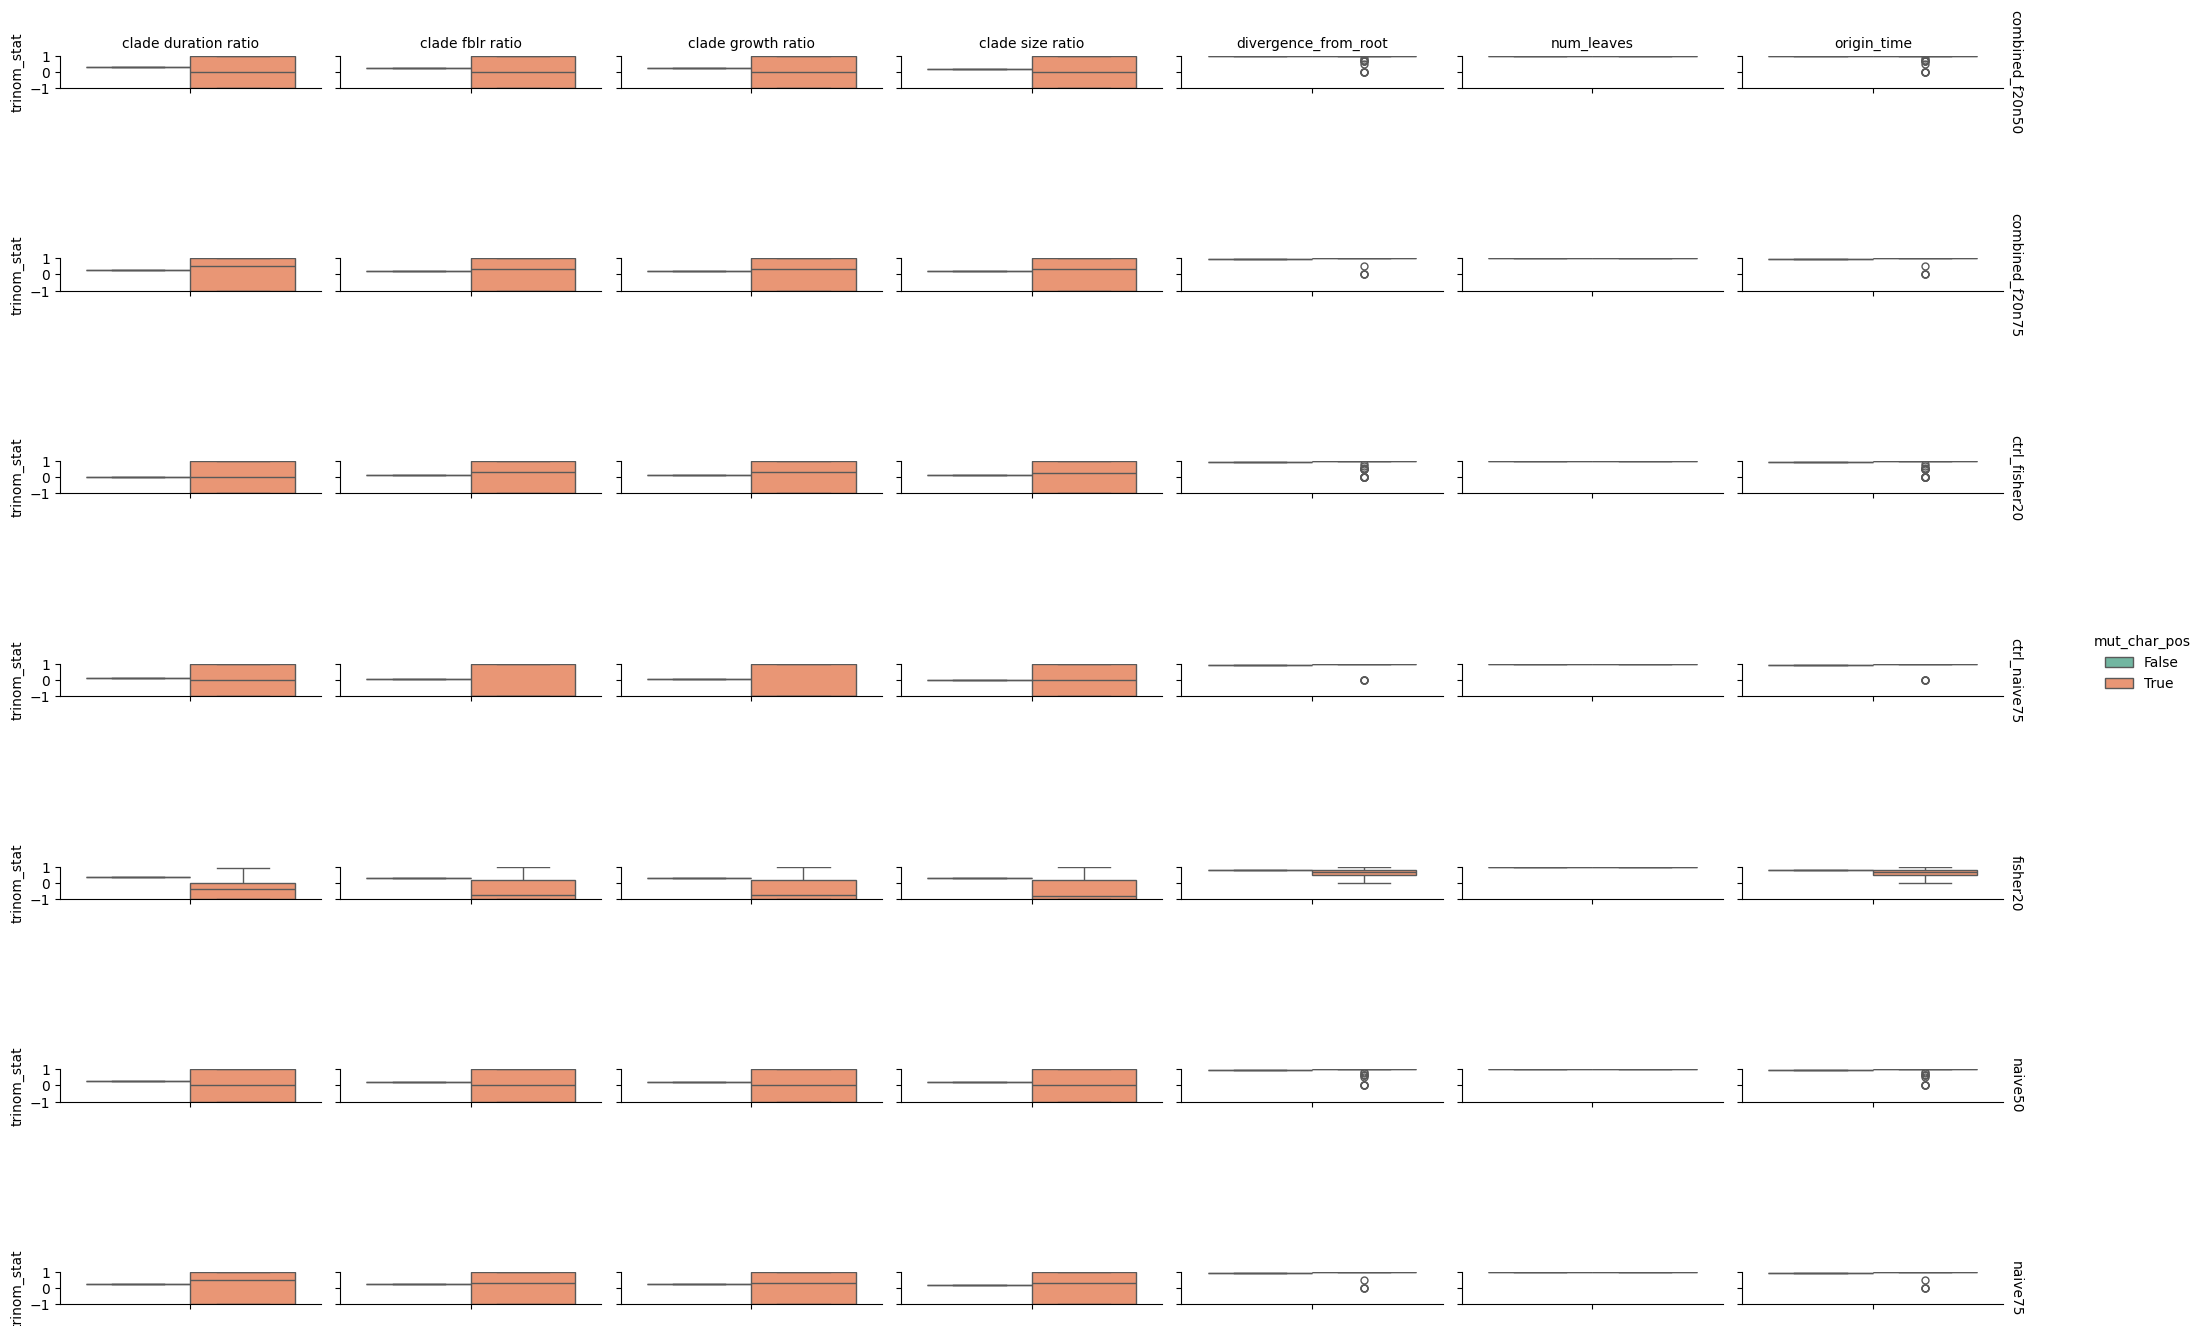

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


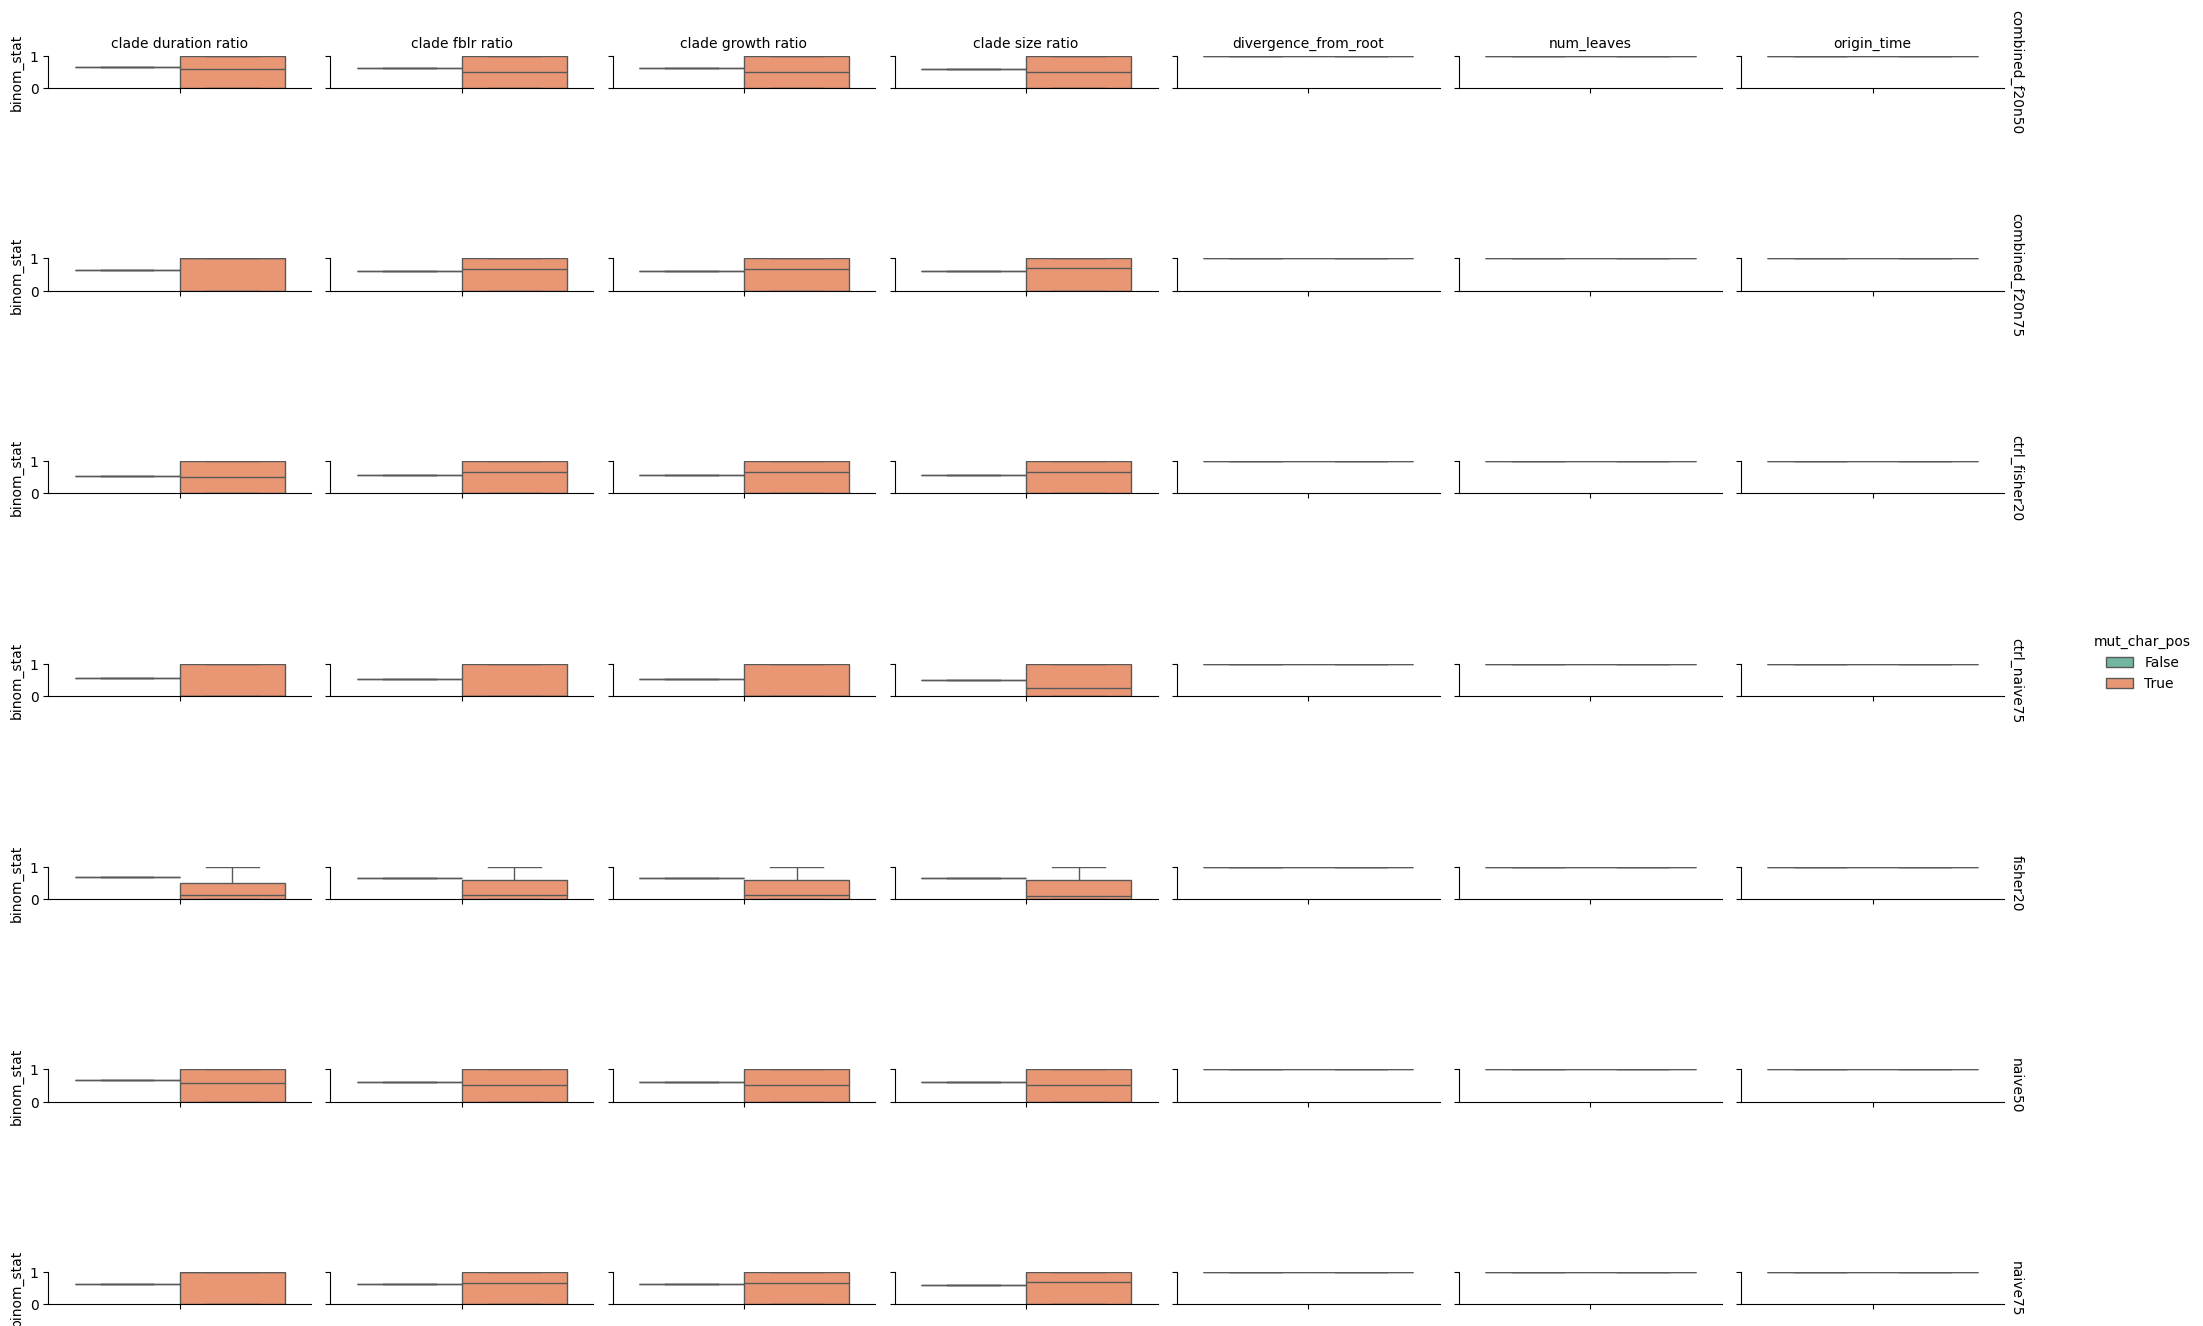

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


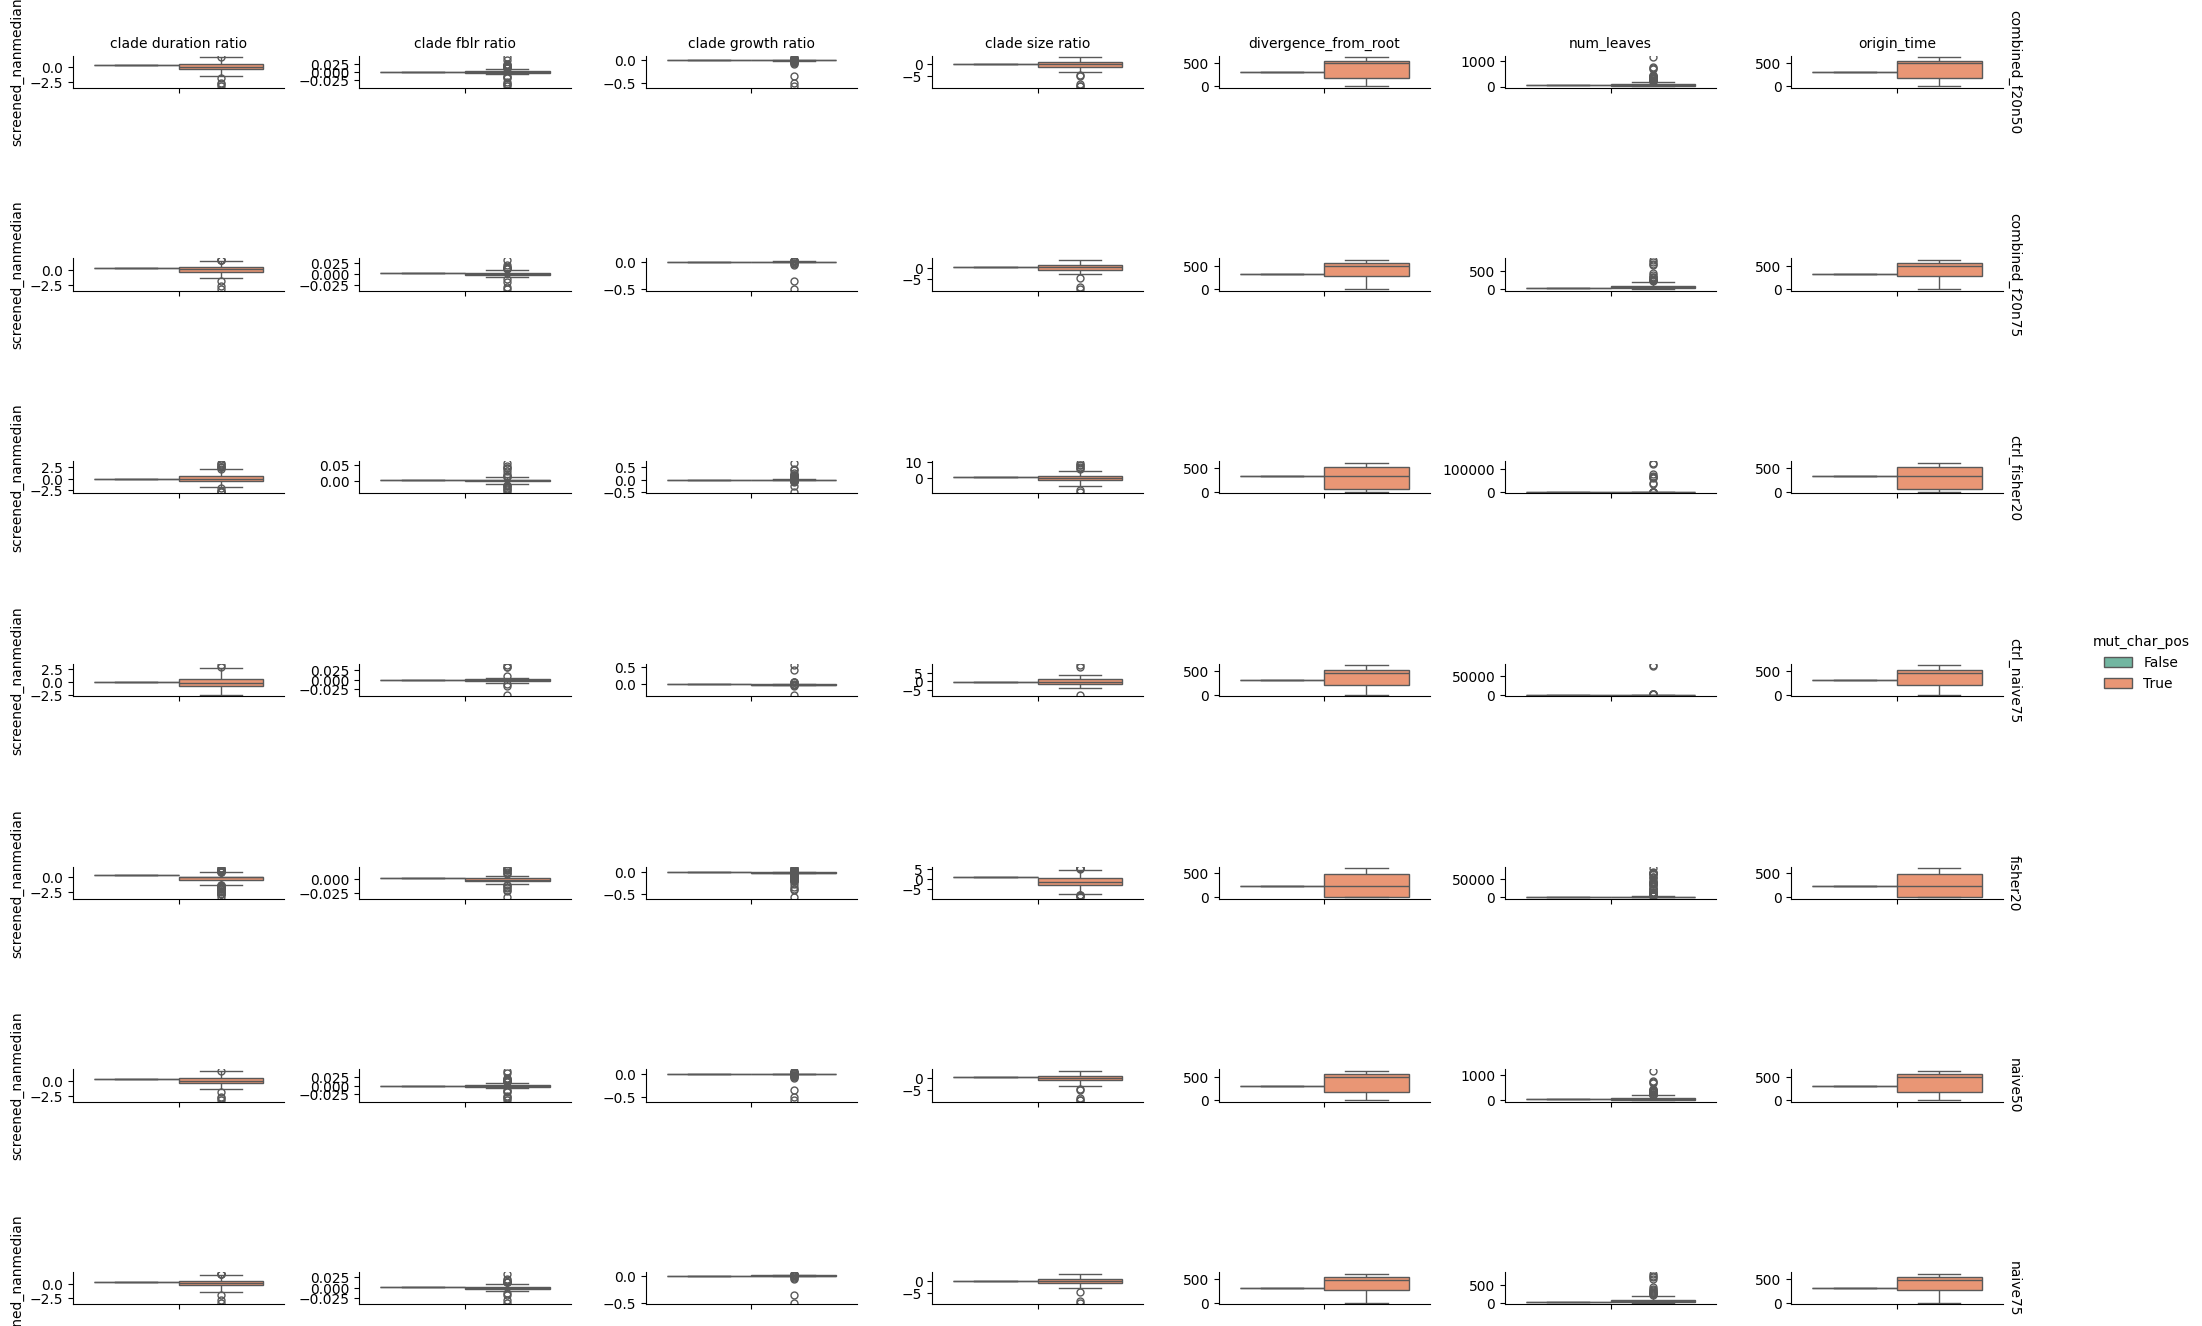

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


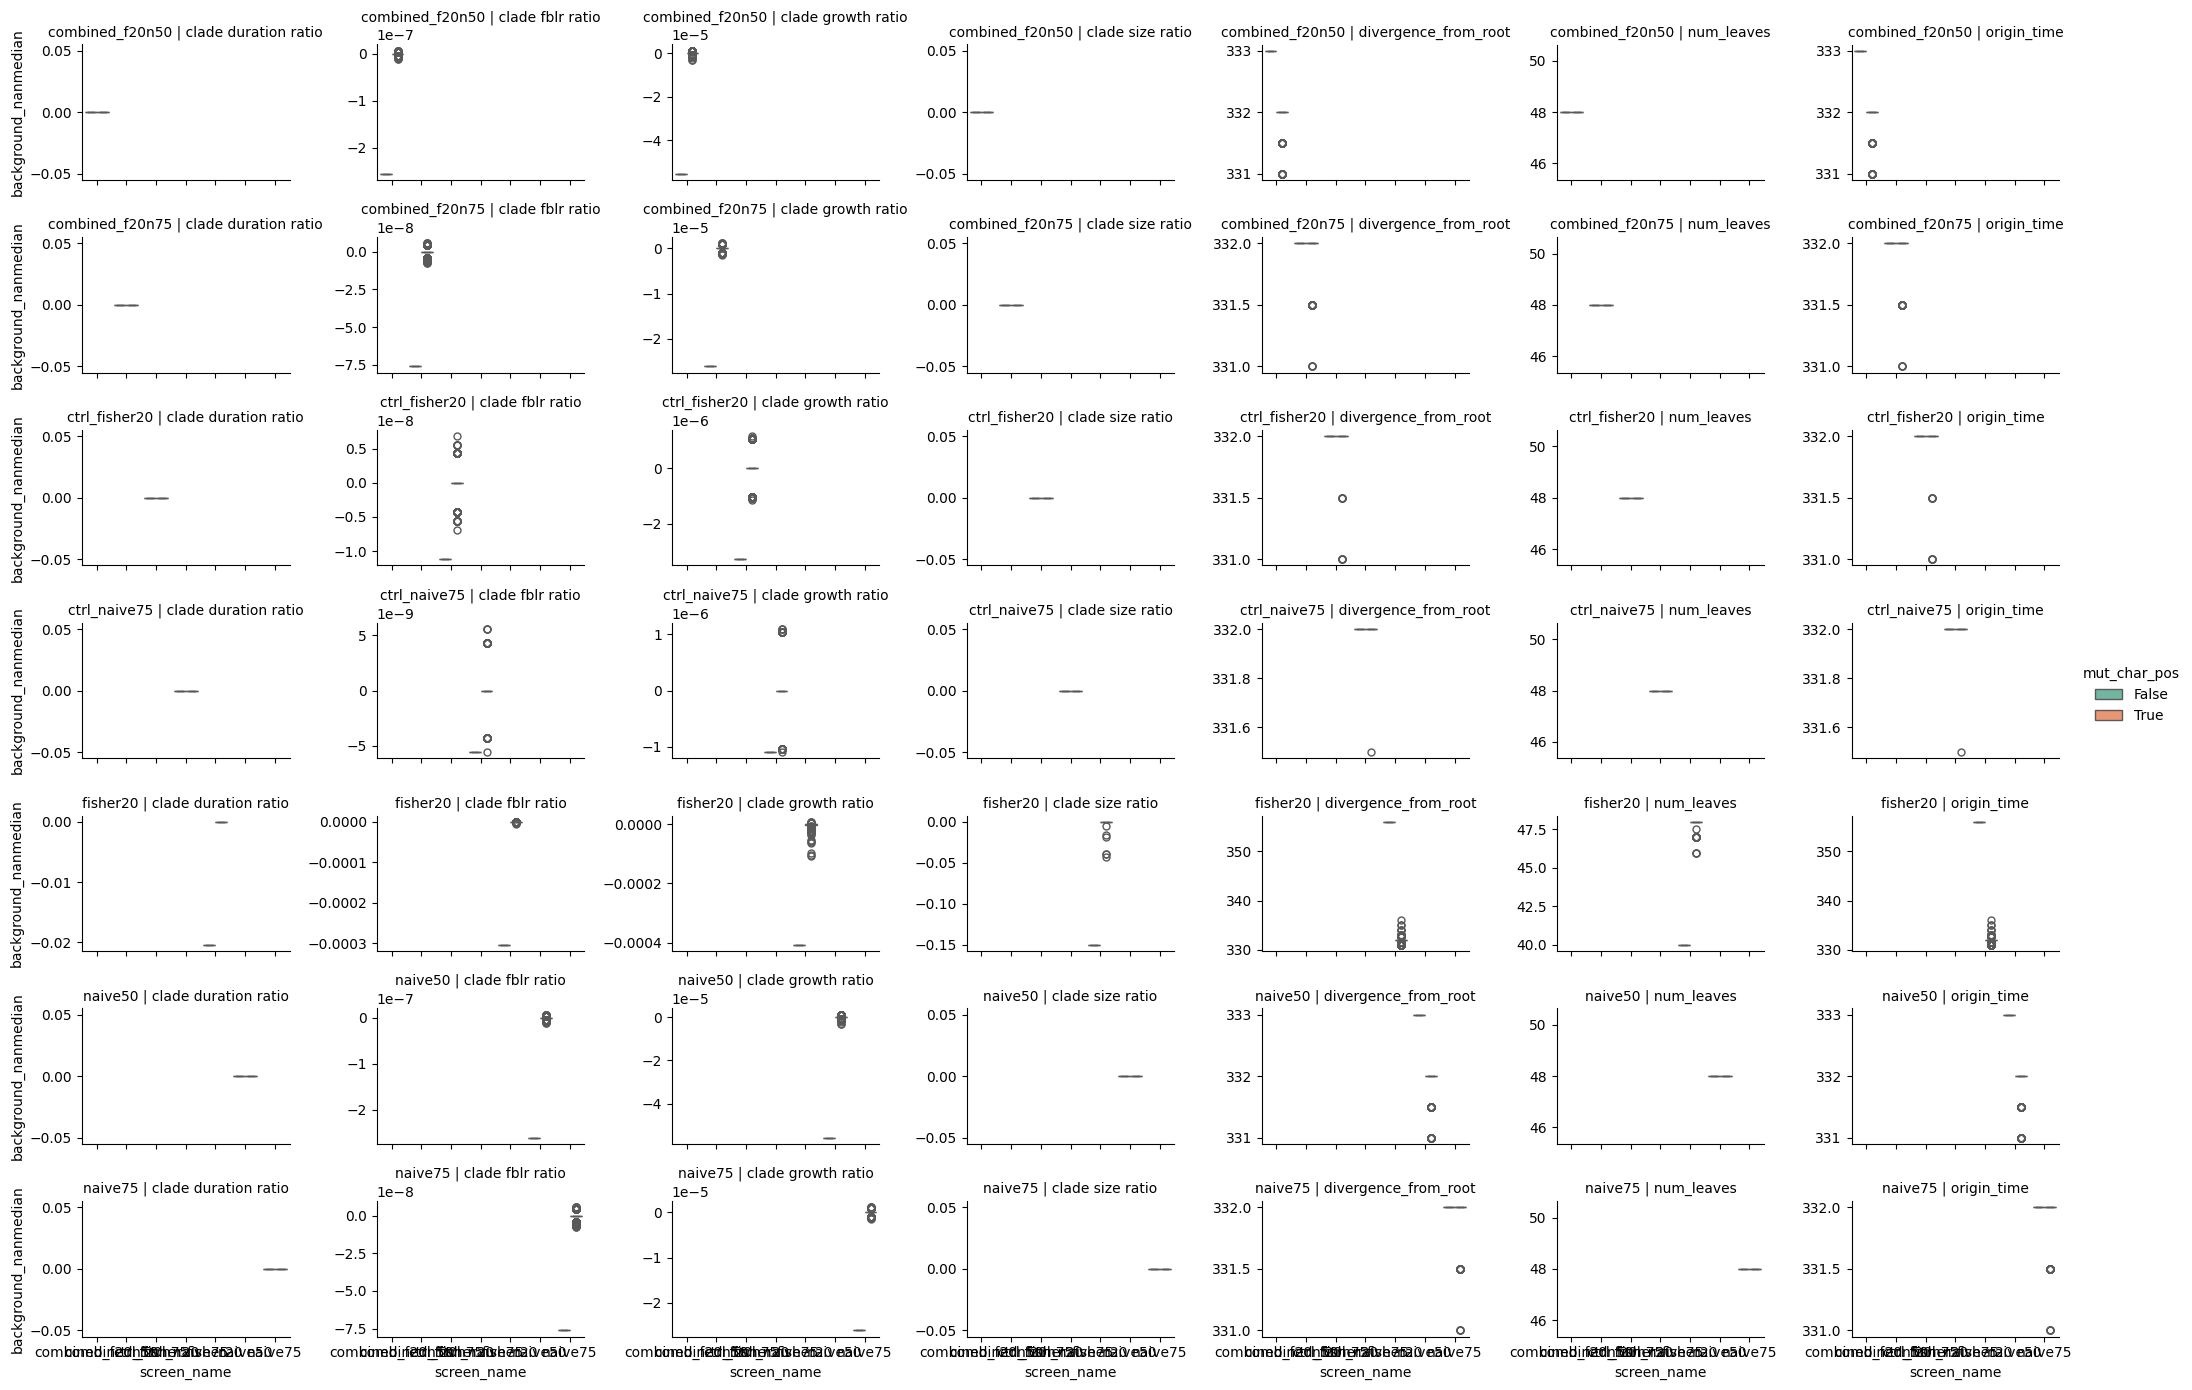

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
